In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [7]:
Aerofit_data= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")
Aerofit_data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [10]:
Aerofit_data.shape

(180, 9)

In [11]:
Aerofit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [12]:
Aerofit_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [13]:
Aerofit_data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [100]:
# Identify categorical and numerical columns
categorical_columns = Aerofit_data.select_dtypes(include=['object'])
numerical_columns = Aerofit_data.select_dtypes(include=['int64', 'float64'])

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
    Product  Gender MaritalStatus
0     KP281    Male        Single
1     KP281    Male        Single
2     KP281  Female     Partnered
3     KP281    Male        Single
4     KP281    Male     Partnered
..      ...     ...           ...
175   KP781    Male        Single
176   KP781    Male        Single
177   KP781    Male        Single
178   KP781    Male     Partnered
179   KP781    Male     Partnered

[180 rows x 3 columns]

Numerical Columns:
     Age  Education  Usage  Fitness  Income  Miles
0     18         14      3        4   29562    112
1     19         15      2        3   31836     75
2     19         14      4        3   30699     66
3     19         12      3        3   32973     85
4     20         13      4        2   35247     47
..   ...        ...    ...      ...     ...    ...
175   40         21      6        5   83416    200
176   42         18      5        4   89641    200
177   45         16      5        5   90886    160
178   47         

In [22]:
Aerofit_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [25]:
# Number of unique products
Aerofit_data["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [26]:
# Each unique product counts
Aerofit_data["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [27]:
Aerofit_data["Product"].nunique()

3

In [31]:
len(Aerofit_data["Product"])

180

In [162]:
# Each unique Gender counts
Aerofit_data["Gender"].value_counts(dropna=False)

Male      104
Female     76
Name: Gender, dtype: int64

In [154]:
# What persentage are male and female are there
Aerofit_data["Gender"].value_counts(normalize=True)*100

Male      57.777778
Female    42.222222
Name: Gender, dtype: float64

In [33]:
Aerofit_data["Age"].nunique()

32

In [158]:
# margins= True means to get the total
pd.crosstab(index=Aerofit_data["Gender"], columns=Aerofit_data["Product"], margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [159]:
pd.crosstab(index=Aerofit_data["Gender"], columns=Aerofit_data["Product"], margins=True, normalize=True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [34]:
# Both Gender counts
Aerofit_data["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [35]:
#Marital status
Aerofit_data["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

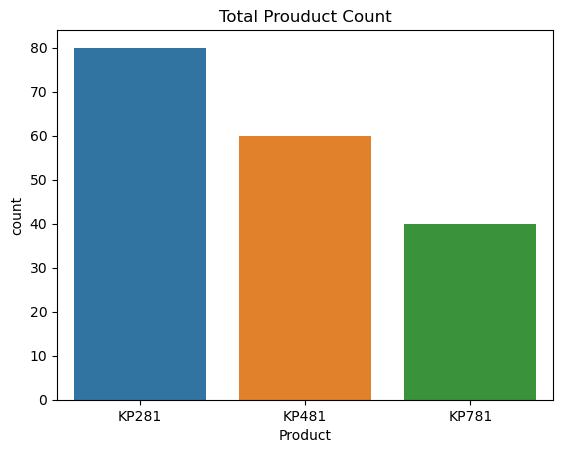

In [37]:
sns.countplot(data=Aerofit_data, x="Product")
plt.title("Total Prouduct Count")
plt.show()

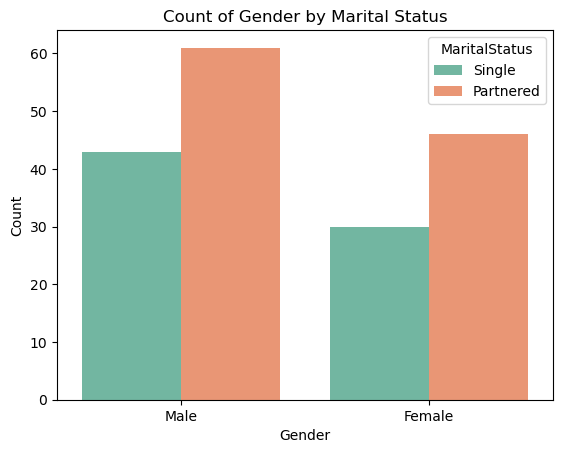

In [60]:
sns.countplot(data=Aerofit_data, x="Gender",  hue="MaritalStatus", palette="Set2")
plt.title("Count of Gender by Marital Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

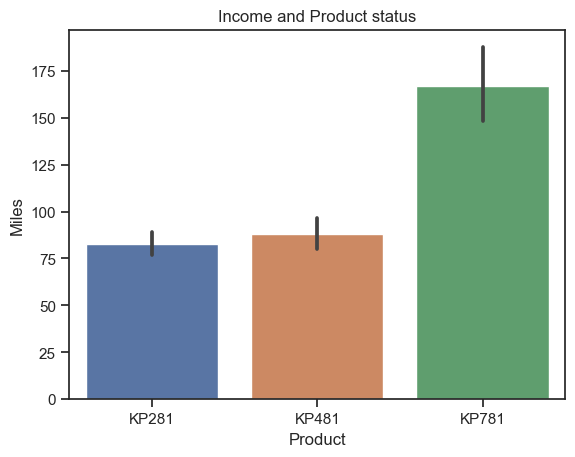

In [142]:
sns.barplot(data=Aerofit_data, y="Miles", x="Product")
plt.title("Income and Product status")
plt.show()

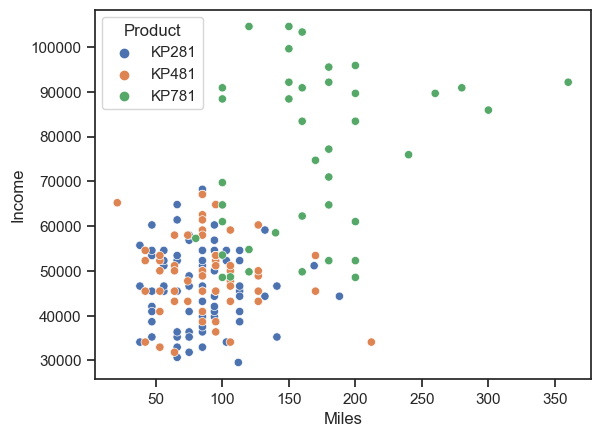

In [148]:
sns.scatterplot(data=Aerofit_data, x="Miles", y="Income", hue="Product")
plt.show()

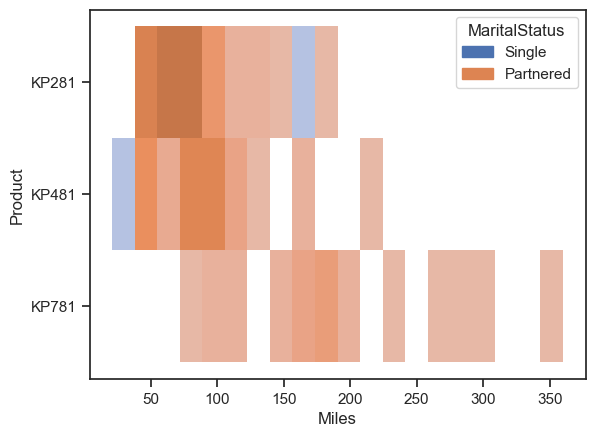

In [139]:
sns.histplot(data=Aerofit_data, x="Miles", y="Product", hue="MaritalStatus")
plt.show()

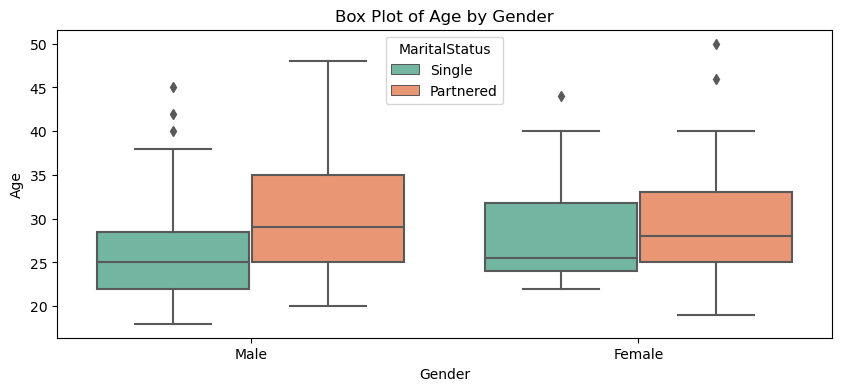

In [84]:
# Box plot for numerical variable (Age) by a categorical variable (Gender)
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(data=Aerofit_data, x="Gender", y="Age", hue="MaritalStatus", palette="Set2")

# Add labels and title
plt.title("Box Plot of Age by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")

plt.show()

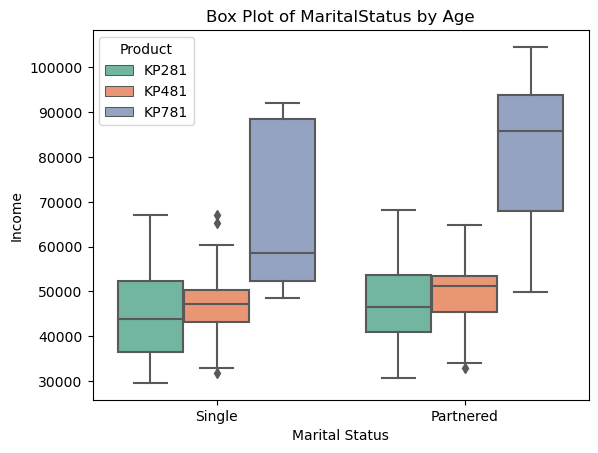

In [87]:
sns.boxplot(data=Aerofit_data, x="MaritalStatus", y="Income", hue="Product", palette="Set2")

# Add labels and title
plt.title("Box Plot of MaritalStatus by Age")
plt.xlabel("Marital Status")
plt.ylabel("Income")

plt.show()

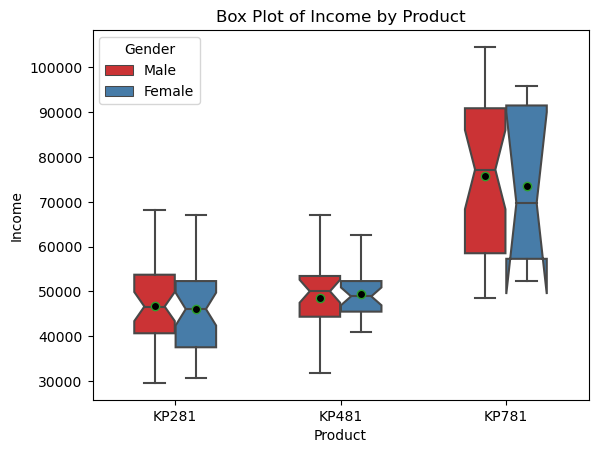

In [80]:
sns.boxplot(data=Aerofit_data, x="Product", y="Income", hue="Gender", palette="Set1",  width=0.5,
            showfliers=False, notch=True, showcaps=True, showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'black'},
            whis=1.5)

# Add labels and title
plt.title("Box Plot of Income by Product")
plt.xlabel("Product")
plt.ylabel("Income")

plt.show()

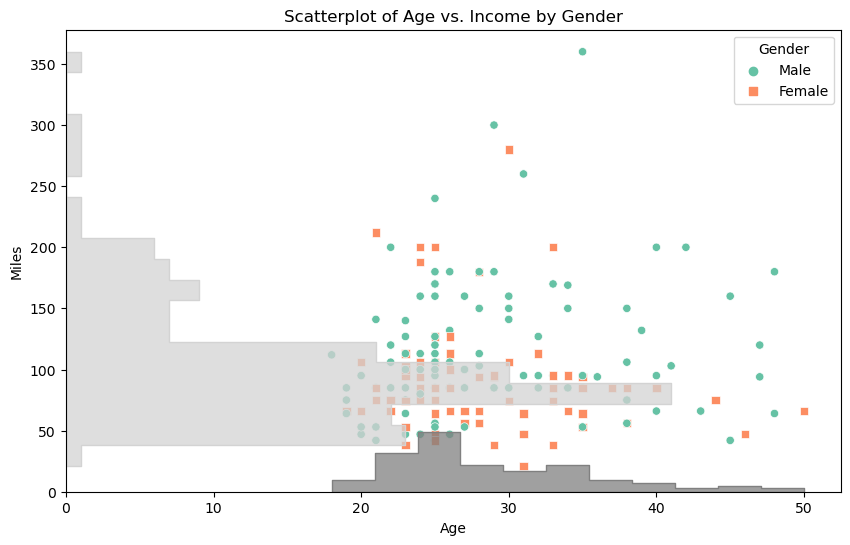

In [92]:
# Create a scatterplot with all possible information
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=Aerofit_data, x="Age", y="Miles", hue="Gender", palette="Set2", style="Gender", markers=["o", "s"])



# Data distribution on the axes
sns.histplot(data=Aerofit_data, x="Age", element="step", common_norm=False, color="gray")
sns.histplot(data=Aerofit_data, y="Miles", element="step", common_norm=False, color="lightgray", legend=False)

# Add labels and title
plt.title("Scatterplot of Age vs. Income by Gender")
plt.xlabel("Age")
plt.ylabel("Miles")
plt.show()

<Figure size 1200x600 with 0 Axes>

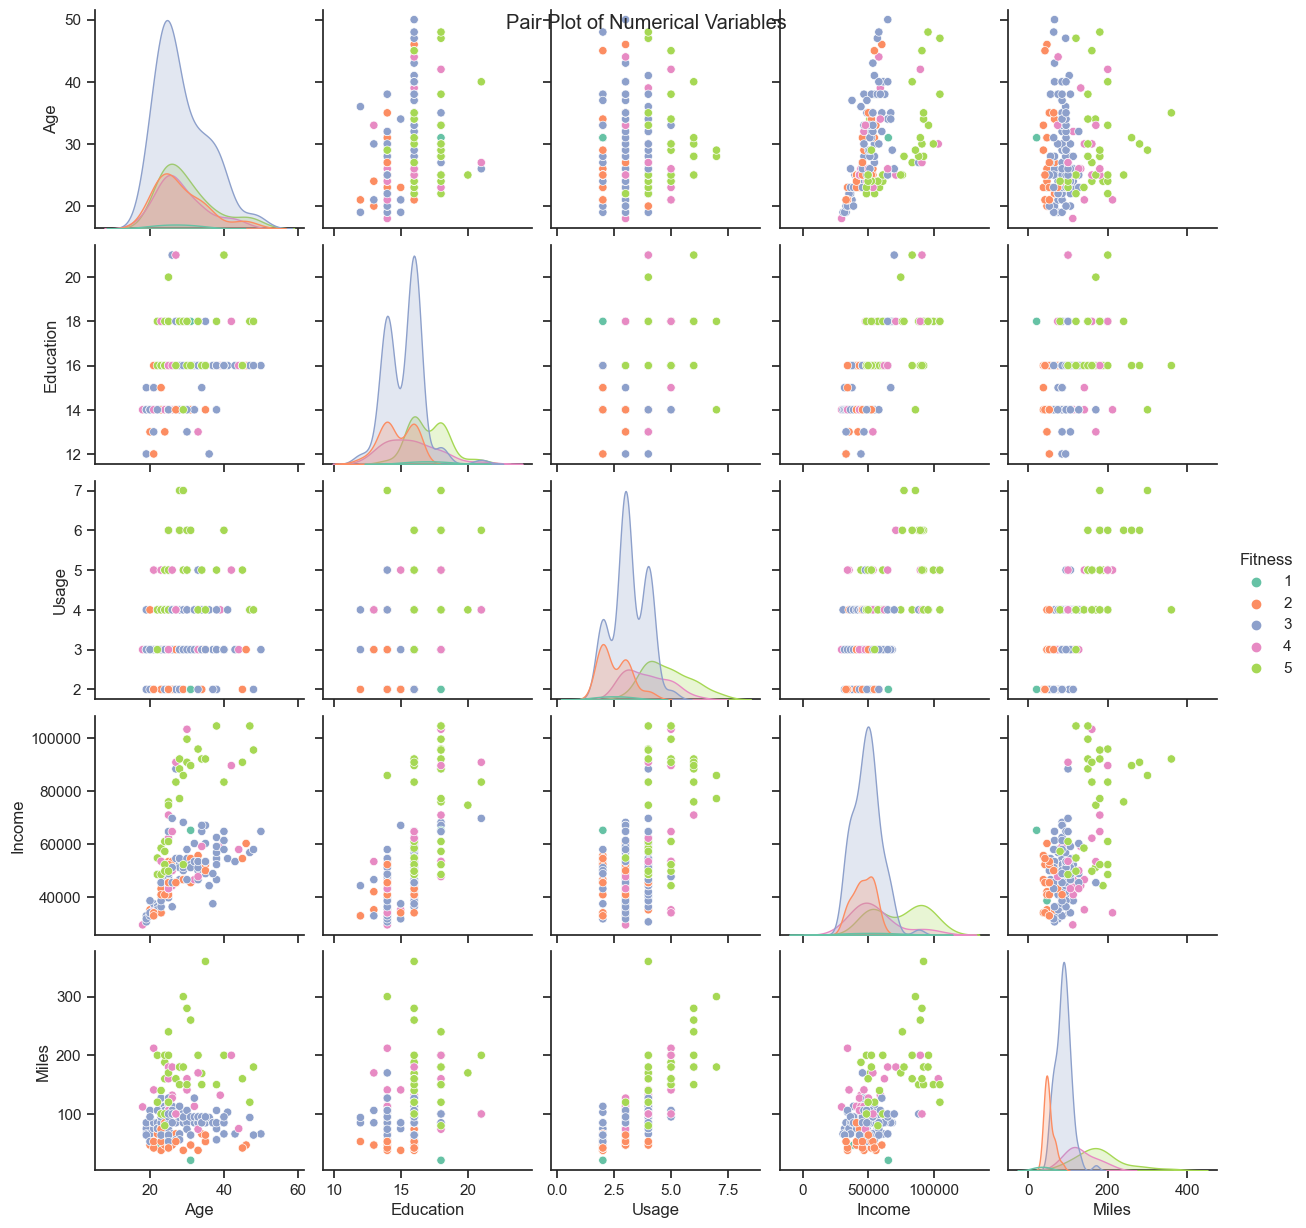

In [117]:
# Create a pair plot to visualize relationships between numerical variables
plt.figure(figsize=(12, 6))
sns.set(style="ticks")
sns.pairplot(data= numerical_columns, diag_kind="kde", hue="Fitness", palette="Set2")

plt.suptitle("Pair Plot of Numerical Variables")
plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_24172\1691317906.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Aerofit_data.corr(),annot=True)


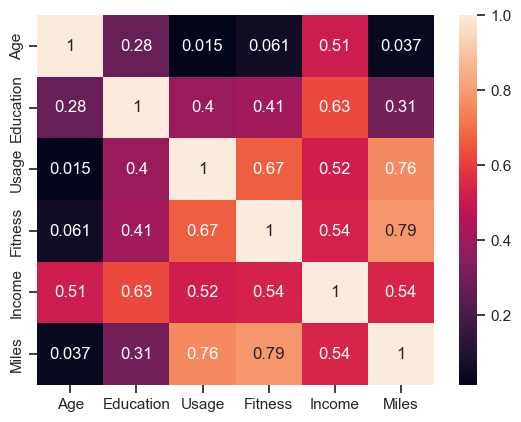

In [151]:
sns.heatmap(Aerofit_data.corr(),annot=True)
plt.show()

In [109]:
#In years
Aerofit_data["Education"].nunique()

8

In [112]:
Aerofit_data["Education"].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [111]:
# Usage:The average number of times the customer plans to use the treadmill each week.

Aerofit_data["Usage"].nunique()

6

In [143]:
Aerofit_data["Usage"].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [113]:
Aerofit_data["Usage"].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [115]:
#Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
Aerofit_data["Fitness"].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

# Solution 4

In [133]:
# Column wise null values chceking
Aerofit_data.isnull().sum(axis=0)

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [134]:
# Row wise null values chceking
Aerofit_data.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
175    0
176    0
177    0
178    0
179    0
Length: 180, dtype: int64

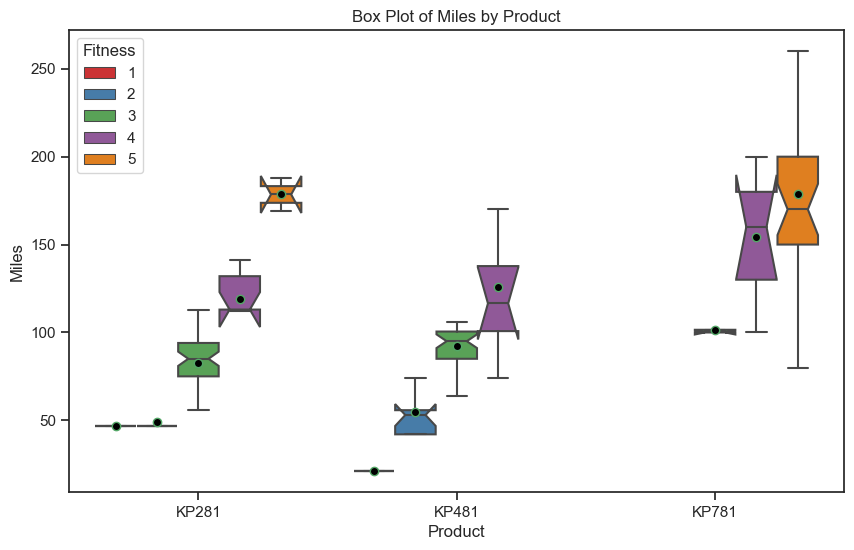

In [123]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Aerofit_data, x="Product", y="Miles", hue="Fitness", palette="Set1",
            showfliers=False, notch=True, showcaps=True, showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'black'},
            whis=1.5)

# Add labels and title
plt.title("Box Plot of Miles by Product")
plt.xlabel("Product")
plt.ylabel("Miles")

plt.show()

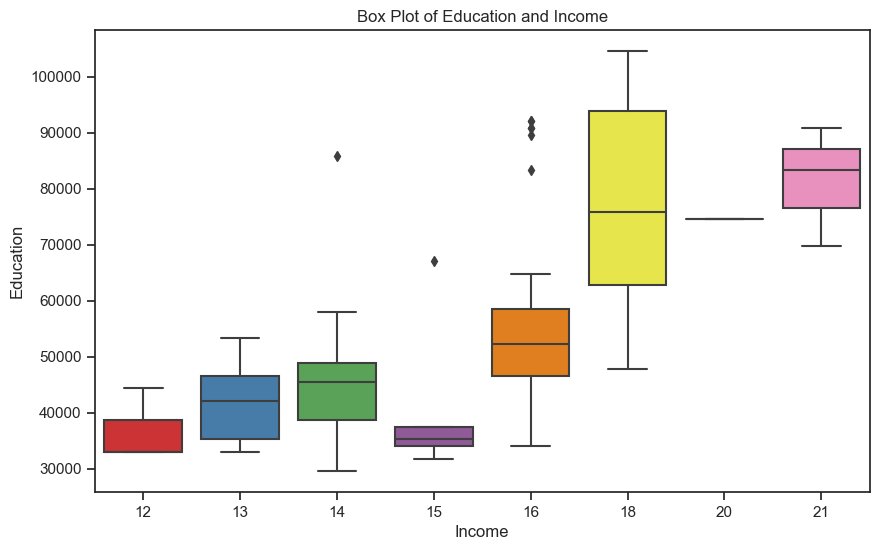

In [146]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Aerofit_data, y="Income", x="Education", palette="Set1", meanprops={'marker':'o', 'markerfacecolor':'black'},
            whis=1.5)

# Add labels and title
plt.title("Box Plot of Education and Income")
plt.xlabel("Income")
plt.ylabel("Education")

plt.show()

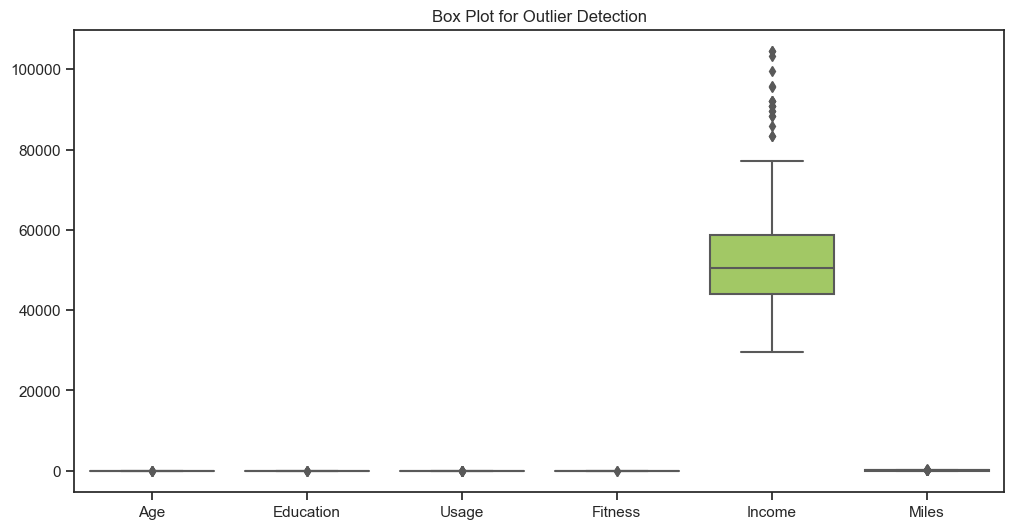

In [135]:
# Create box plots to visualize potential outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_columns, palette="Set2")
plt.title("Box Plot for Outlier Detection")
plt.show()

In [1]:
# chi-test

In [3]:
from scipy.stats import chi2_contingency

In [ ]:
#Ho: MaritalStatus and Product are independent
#Ha: MaritalStatus and Product are dependent

In [30]:
alpha= 0.05
chi_stat, p_value, df, exp_freq =chi2_contingency(pd.crosstab(Aerofit_data["MaritalStatus"], Aerofit_data["Product"]))
print(p_value)

0.9604745988058153


In [31]:
if(p_value < alpha):
    print("Reject null hypythesis")
else:
    print("Fail to reject null hypothesis means H0 passed or H0 is true")

Fail to reject null hypothesis means H0 passed or H0 is true


# Conclusion: MaritalStatus and Product are independent

In [ ]:
#H0: Gender and product are independent
#Ha: Gender and product are dependent

In [13]:
data = pd.crosstab(Aerofit_data["Gender"], Aerofit_data["Product"])
data

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [19]:
data.dtypes

Product
KP281    int64
KP481    int64
KP781    int64
dtype: object

In [22]:
# check whether it is a Series and DataFrame
type(data)

pandas.core.frame.DataFrame

In [25]:
chi_stat, p_value, df, exp_freq= chi2_contingency(data)
print(p_value)
print(chi_stat)
print(df)
print(exp_freq)

0.0015617972833158714
12.923836032388664
2
[[33.77777778 25.33333333 16.88888889]
 [46.22222222 34.66666667 23.11111111]]


In [26]:
alpha= 0.01

In [28]:
if(p_value < alpha):
    print("Reject null hypythesis means H0 failed")
else:
    print("Fail to reject null hypothesis means H0 passed")

Reject null hypythesis means H0 failed


# Conclusion: Gender and product are dependent or Gender impact product

# Findings-

1. There are 3 categories of products.
   'KP281', 'KP481', and 'KP781' and there running capacity and price increses respectively.
2. Each product divide on the basis of miles.
3. 'KP781' is costly product through which extra miles (50 to 350 miles) are covered and usually purchased by users having 
   salary gretaer than 60000 if user is married.
4. As the user education is increasing the income of the user also increaing.
5. 'KP781' is brought by users who want to run more like upto 350 miles.
6. There are 58% male buyer and 42% females.
7. Most Customer are from 22 to 35 Age.
8. For "KP281" male and female buying ratio is 22%.
9. 5 fitness ranking is mostly achived by user of product "KP781"
10. 'KP481' is usually brought buy users having income between 45000 to 55000.
11. For single person median income is 60000 to buy 'KP781' but for marrid it is "90000".
12. 'KP281' is most purchased product then "KP481" and "KP781" respectively.
13. Fitness is most corelated with number of miles(Heatmap).
14. 3.89% is probability of female purcahsing "KP781".
15. The probability of male purcahsing "KP781" is 18%.

# Recommendations for Enhancing Business Profit


Targeted Marketing Campaigns

Focus 'KP781' marketing on married users with incomes over $90,000.
Promote 'KP481' to users with incomes between $45,000 and $55,000.
Target the 22-35 age group through social media and digital platforms.
Gender-Specific Strategies

Increase female purchase rates for 'KP781' through female-focused campaigns.
Emphasize 'KP781' features to attract more male buyers.
Educational Content and Promotions

Develop content on the benefits of running more miles.
Link educational achievements to potential income and fitness benefits.
Product Differentiation and Upselling

Highlight differences between KP281, KP481, and KP781.
Encourage upgrades from 'KP281' to 'KP481' or 'KP781' with discounts and trade-ins.
Enhancing Customer Experience

Offer personalized product recommendations based on user profiles.
Implement a feedback system to improve products and services.
Promotional Offers and Loyalty Programs

Offer discounts for new customers, especially in the 22-35 age group.
Develop loyalty programs rewarding repeat purchases and long-term usage.
Partnerships and Collaborations

Collaborate with companies for employee wellness programs.
Partner with fitness influencers to advocate Aerofit products.
Expand Product Range

Develop intermediate products between KP281, KP481, and KP781.
Introduce accessories and add-ons like fitness trackers and apparel.

# Thankyou